In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

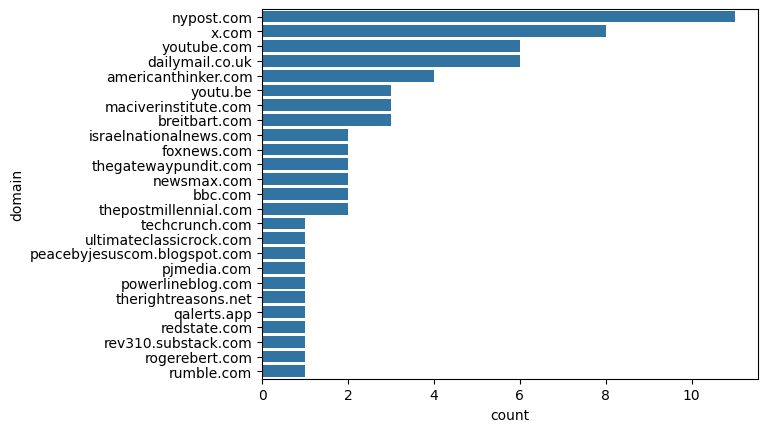

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

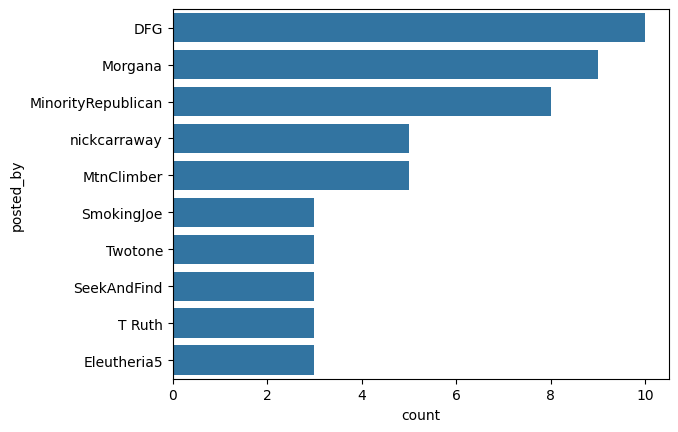

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_99614/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain         \
                                            count unique   
domain                  posted_by                          
americanthinker.com     MtnClimber              2      1   
                        SeekAndFind             2      1   
breitbart.com           DFG                     1      1   
                        Eleutheria5             1      1   
dailymail.co.uk         DFG                     1      1   
                        MinorityRepublican      1      1   
                        Morgana                 3      1   
foxnews.com             MinorityRepublican      1      1   
israelnationalnews.com  Eleutheria5             2      1   
maciverinstitute.com    T Ruth                  3      1   
newsmax.com             MinorityRepublican      1      1   
nypost.com              DFG                     4      1   
                        MinorityRepublican      1      1   
                        nickcarraway            2      1   
powerlineblog.com       DFG                     1      1   
thegatewaypundit.com    Morgana                 2      1   
thepostmillennial.com   Morgana                 2      1   
ultimateclassicrock.com nickcarraway            1      1   
x.com                   DFG                     2      1   
                        SmokingJoe              2      1   
youtube.com             Morgana                 1      1   
                        SmokingJoe              1      1   

                                                                          
                                                                top freq  
domain                  posted_by                                         
americanthinker.com     MtnClimber              americanthinker.com    2  
                        SeekAndFind             americanthinker.com    2  
breitbart.com           DFG                           breitbart.com    1  
                        Eleutheria5                   breitbart.com    1  
dailymail.co.uk         DFG                         dailymail.co.uk    1  
                        MinorityRepublican          dailymail.co.uk    1  
                        Morgana                     dailymail.co.uk    3  
foxnews.com             MinorityRepublican              foxnews.com    1  
israelnationalnews.com  Eleutheria5          israelnationalnews.com    2  
maciverinstitute.com    T Ruth                 maciverinstitute.com    3  
newsmax.com             MinorityRepublican              newsmax.com    1  
nypost.com              DFG                              nypost.com    4  
                        MinorityRepublican               nypost.com    1  
                        nickcarraway                     nypost.com    2  
powerlineblog.com       DFG                       powerlineblog.com    1  
thegatewaypundit.com    Morgana                thegatewaypundit.com    2  
thepostmillennial.com   Morgana               thepostmillennial.com    2  
ultimateclassicrock.com nickcarraway        ultimateclassicrock.com    1  
x.com                   DFG                                   x.com    2  
                        SmokingJoe                            x.com    2  
youtube.com             Morgana                         youtube.com    1  
                        SmokingJoe                      youtube.com    1

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_99614/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
